In [2]:
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import ZScaleInterval
from copy import deepcopy
import random

In [226]:
path_img = '../../../npy_dataset/images/train/'
list_of_items = glob.glob(path_img + '*.npy')
len(list_of_items)

110

In [227]:
i = random.randint(0, len(list_of_items))
sample_npy = np.load(list_of_items[i])
print(sample_npy.shape)
sample_npy = sample_npy.reshape(sample_npy.shape[0], sample_npy.shape[1], 1)
print(sample_npy.shape)

(1024, 1024)
(1024, 1024, 1)


In [16]:
z = ZScaleInterval(nsamples=600)

In [13]:
def apply_filter(im, fil): # Apply particular filter to image
        im = np.interp(im, (im.min(), im.max()), (0, 1))
        filter_name = fil
        if filter_name == "Linear":
            im = im
        elif filter_name == "Log":
            e = np.exp(-10 * im)
            im = (e - 1) / (np.exp(-10) - 1)
        elif filter_name == "Power":
            im = (np.power(1000, im) - 1) / 1000.0
        elif filter_name == "Sqrt":
            # fil < 0 with 0
            im[im < 0] = 0.0
            im = np.sqrt(im)
        elif filter_name == "Squared":
            im = im**2
        elif filter_name == "ASINH":
            im = (np.arcsinh(10*im)) / 3
        elif filter_name == "SINH":
            im = (np.sinh(3*im)) / 10
        else:
            print("No filter applied")

        im = z(im) # -> return values between 0 and 1
        return im

def preprocess_baseline(im):
        if len(im.shape) == 2:
            im = np.expand_dims(im, axis=-1)

        im_non_nan = deepcopy(im)
        
        # Handle negative values, nan values and inf values
        im_non_nan[im_non_nan < 0] = 0.0
        change_nan = 0.0
        im_non_nan = np.nan_to_num(im_non_nan, nan=change_nan, posinf=change_nan, neginf=change_nan)

        im_non_nan = z(im_non_nan) # -> return values between 0 and 1

        return im_non_nan

def preprocess_for_filters(im):
        if len(im.shape) == 2:
            im = np.expand_dims(im, axis=-1)

        im_non_nan = deepcopy(im)

        # Handle negative values, nan values and inf values
        im_non_nan[im_non_nan < 0] = 0.0
        change_nan = 0.0
        im_non_nan = np.nan_to_num(im_non_nan, nan=change_nan, posinf=change_nan, neginf=change_nan)

        return im_non_nan

In [12]:
def display_stat(object):
    print('Max pixel value: ', np.max(object), '| Min pixel value: ', \
         np.min(object), '| Std: ', np.std(object), '| Mean: ', np.mean(object))

def visulize_data(img, title, cmap='gray', bins=100):
    display_stat(img)

    # plot image and histogram side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4))
    ax1.imshow(img, cmap=cmap)
    ax1.set_title(title)
    ax2.hist(img.flatten(), bins=bins, density=True, alpha=0.5, color='b')
    ax2.set_xlabel('Pixel value')
    ax2.set_ylabel('Density')
    ax2.set_title('Histogram of {} (bins: {})'.format(title, bins))
    plt.show()

# Zscale

Now, the experiment is based on Zscale normalization (data pre-processed by this sesstion)
<br><br>
From experiment of this session we can observe that most of the filters are not changing the distribution of the image.<br>
So, or we need to change the measurment to explore how are they working well?


__Note__ : Distribution shape depends on the image. if the image is too dark or they have many dead pixels (or infinity values) the distribution will be dentisity on the left side, cause by handle negative values, nan values and inf values with replace them by 0.0.


## Baseline Image

Max pixel value:  1.0 | Min pixel value:  0.0 | Std:  0.19065551 | Mean:  0.3943803


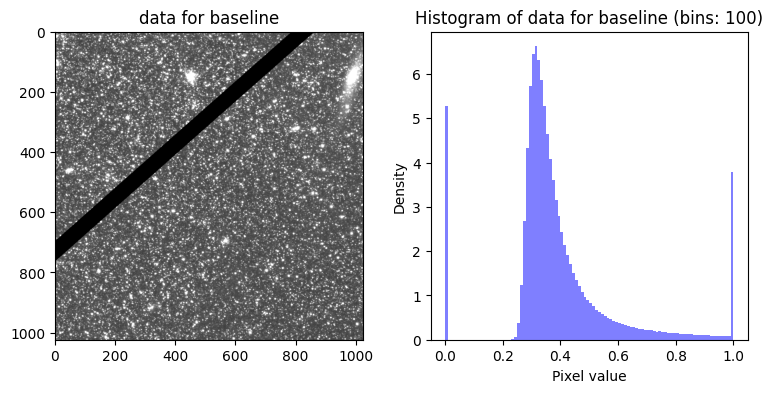

In [231]:
# plot density histogram of sample_npy
sample_npy_baseline = deepcopy(sample_npy)
sample_npy_baseline = preprocess_baseline(sample_npy_baseline)

visulize_data(sample_npy_baseline, 'data for baseline')

## Multi-filter Image

In [11]:
def comparison_plot(baseline, filtered, title, cmap='gray', bins=100):
    # plot 3 image, with 1 row and 3 columns. First column is baseline image, second column is filtered image, third column is histogram that overlabed with baseline and filtered image
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 6))
    print('Baseline --> ', end='')
    display_stat(baseline)
    ax1.imshow(baseline, cmap=cmap)
    ax1.set_title('Baseline')
    print('{} --> '.format(title), end='')
    display_stat(filtered)
    ax2.imshow(filtered, cmap=cmap)
    ax2.set_title(title)
    ax3.hist(baseline.flatten(), bins=bins, density=True, alpha=0.5, color='b', label='Baseline')
    ax3.hist(filtered.flatten(), bins=bins, density=True, alpha=0.2, color='r', label=title)
    ax3.set_xlabel('Pixel value')
    ax3.set_ylabel('Density')
    ax3.set_title('Histogram of {} (bins: {})'.format(title, bins))
    ax3.legend()
    plt.show()

In [233]:
sample_npy_filters = deepcopy(sample_npy)
sample_npy_filters = preprocess_for_filters(sample_npy_filters)

In [234]:
linear_npy = apply_filter(sample_npy_filters, 'Linear')
log_npy = apply_filter(sample_npy_filters, 'Log')
power_npy = apply_filter(sample_npy_filters, 'Power')
sqrt_npy = apply_filter(sample_npy_filters, 'Sqrt')
squared_npy = apply_filter(sample_npy_filters, 'Squared')
asinh_npy = apply_filter(sample_npy_filters, 'ASINH')
sinh_npy = apply_filter(sample_npy_filters, 'SINH')

Baseline --> Max pixel value:  1.0 | Min pixel value:  0.0 | Std:  0.19065551 | Mean:  0.3943803
Linear --> Max pixel value:  1.0 | Min pixel value:  0.0 | Std:  0.1906555257974368 | Mean:  0.39438015568704793


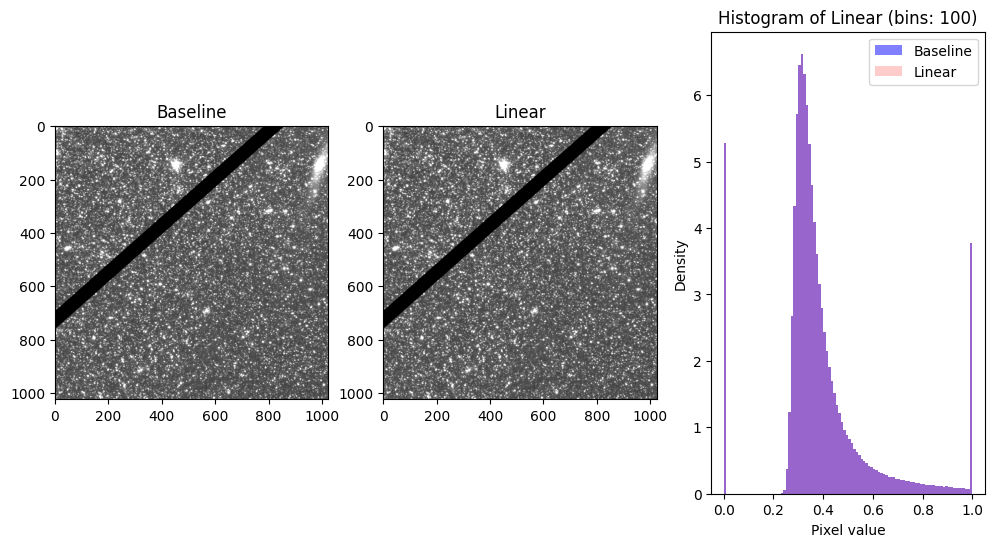

Baseline --> Max pixel value:  1.0 | Min pixel value:  0.0 | Std:  0.19065551 | Mean:  0.3943803
Log --> Max pixel value:  1.0 | Min pixel value:  0.0 | Std:  0.1895108186467744 | Mean:  0.3991251193184889


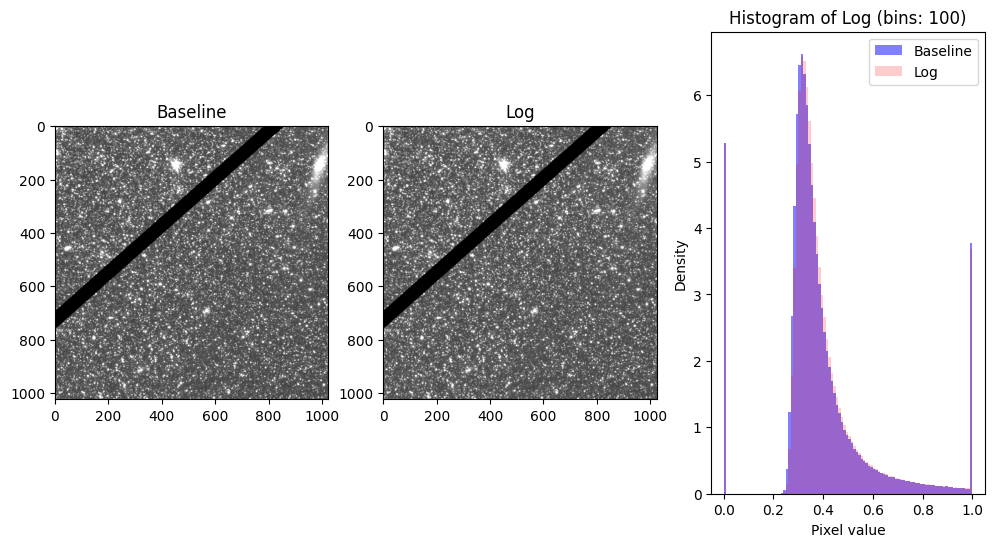

Baseline --> Max pixel value:  1.0 | Min pixel value:  0.0 | Std:  0.19065551 | Mean:  0.3943803
Power --> Max pixel value:  1.0 | Min pixel value:  0.0 | Std:  0.19196732415451673 | Mean:  0.3936907156164664


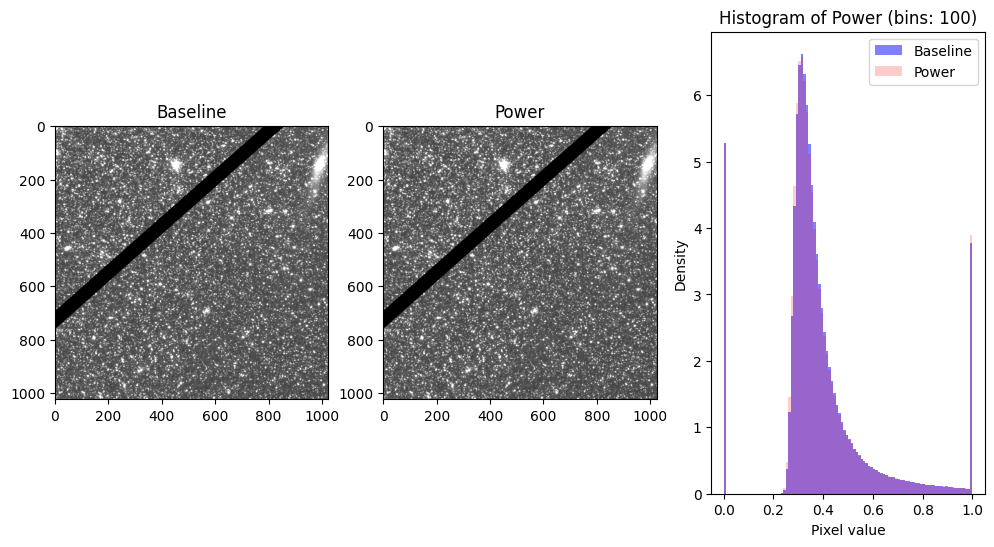

Baseline --> Max pixel value:  1.0 | Min pixel value:  0.0 | Std:  0.19065551 | Mean:  0.3943803
Sqrt --> Max pixel value:  1.0 | Min pixel value:  0.0 | Std:  0.1739653405160234 | Mean:  0.5174147277523186


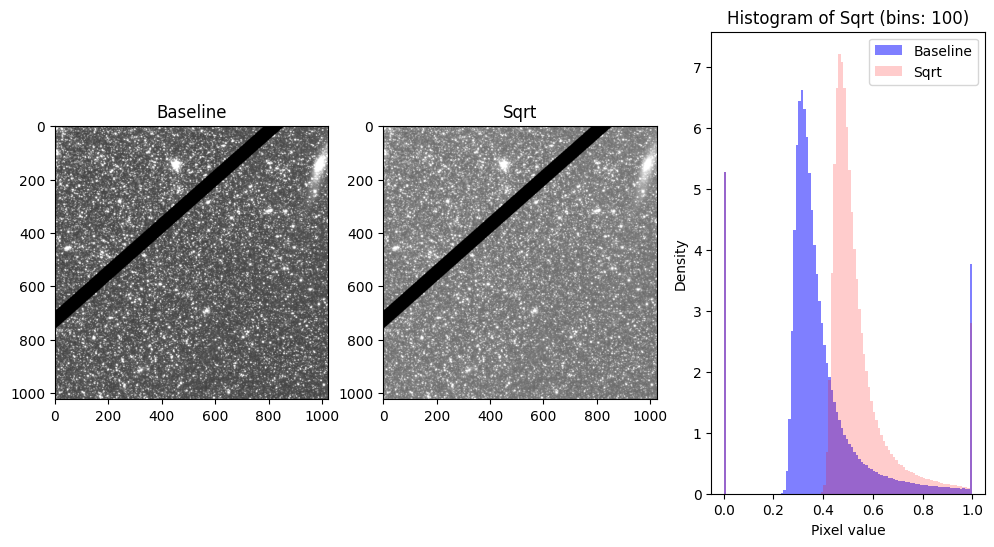

Baseline --> Max pixel value:  1.0 | Min pixel value:  0.0 | Std:  0.19065551 | Mean:  0.3943803
Squared --> Max pixel value:  1.0 | Min pixel value:  0.0 | Std:  0.23659846560270487 | Mean:  0.2781917769165791


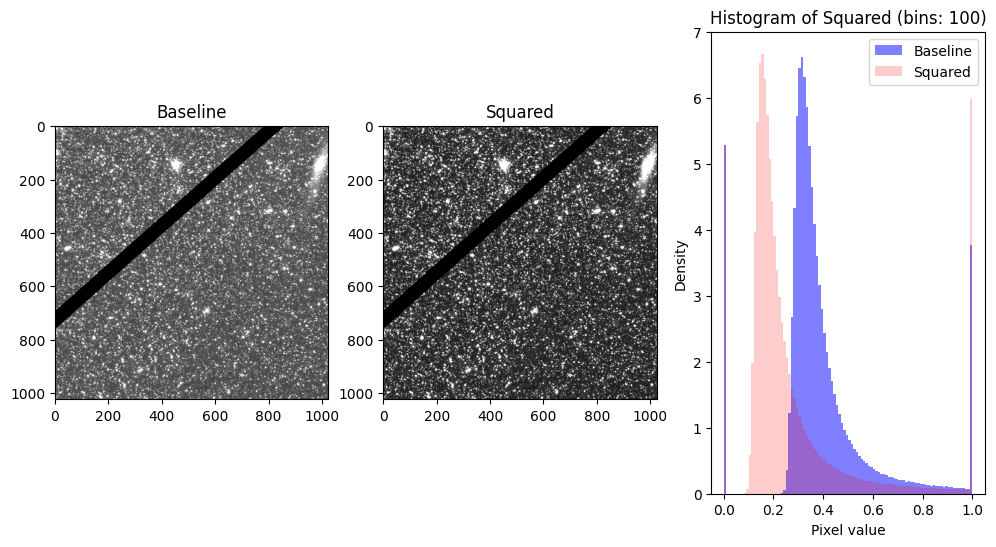

Baseline --> Max pixel value:  1.0 | Min pixel value:  0.0 | Std:  0.19065551 | Mean:  0.3943803
ASINH --> Max pixel value:  1.0 | Min pixel value:  0.0 | Std:  0.1906018299168149 | Mean:  0.39446039189675636


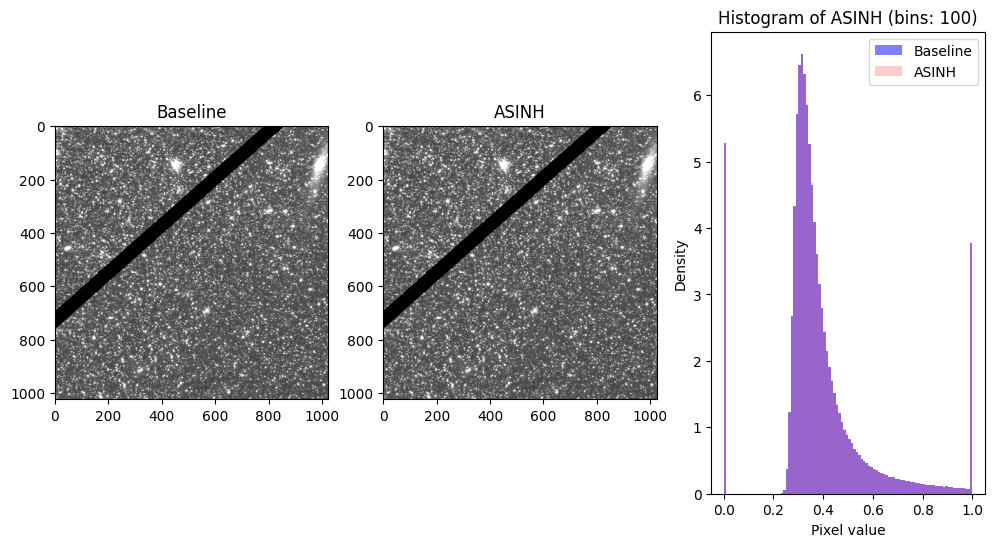

Baseline --> Max pixel value:  1.0 | Min pixel value:  0.0 | Std:  0.19065551 | Mean:  0.3943803
SINH --> Max pixel value:  1.0 | Min pixel value:  0.0 | Std:  0.19066036591147512 | Mean:  0.3943729290030222


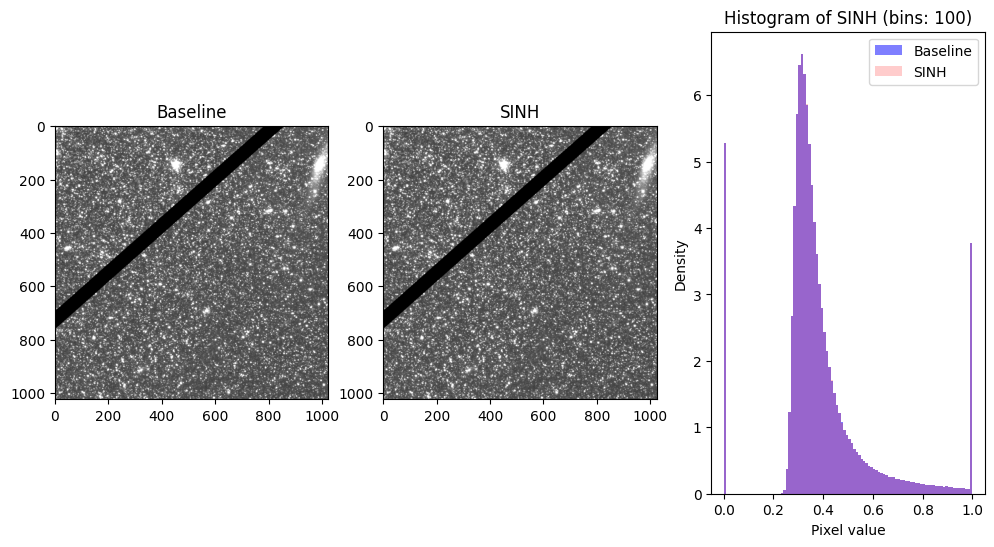

In [235]:
comparison_plot(sample_npy_baseline, linear_npy, 'Linear')
comparison_plot(sample_npy_baseline, log_npy, 'Log')
comparison_plot(sample_npy_baseline, power_npy, 'Power')
comparison_plot(sample_npy_baseline, sqrt_npy, 'Sqrt')
comparison_plot(sample_npy_baseline, squared_npy, 'Squared')
comparison_plot(sample_npy_baseline, asinh_npy, 'ASINH')
comparison_plot(sample_npy_baseline, sinh_npy, 'SINH')

# No Zscale

Below is the experiment without Zscale normalization for comparison, what if we don't normalize the data.
Results show that distribution of pixel values seems not changed, but the image only looks darker (hard to see the details).

In [236]:
def apply_filter(im, fil): # Apply particular filter to image
        im = np.interp(im, (im.min(), im.max()), (0, 1))
        filter_name = fil
        if filter_name == "Linear":
            im = im
        elif filter_name == "Log":
            e = np.exp(-10 * im)
            im = (e - 1) / (np.exp(-10) - 1)
        elif filter_name == "Power":
            im = (np.power(1000, im) - 1) / 1000.0
        elif filter_name == "Sqrt":
            # fil < 0 with 0
            im[im < 0] = 0.0
            im = np.sqrt(im)
        elif filter_name == "Squared":
            im = im**2
        elif filter_name == "ASINH":
            im = (np.arcsinh(10*im)) / 3
        elif filter_name == "SINH":
            im = (np.sinh(3*im)) / 10
        else:
            print("No filter applied")

        # convert back to 0-1, for YOLO network
        im = np.interp(im, (im.min(), im.max()), (0, 1))
        return im

def preprocess_baseline(im):
        if len(im.shape) == 2:
            im = np.expand_dims(im, axis=-1)

        im_non_nan = deepcopy(im)

        im_non_nan[im_non_nan < 0] = 0.0
        change_nan = 0.0
        im_non_nan = np.nan_to_num(im_non_nan, nan=change_nan, posinf=change_nan, neginf=change_nan)

        im_non_nan = np.interp(im_non_nan, (im_non_nan.min(), im_non_nan.max()), (0, 1))

        return im_non_nan

def preprocess_for_filters(im):
        if len(im.shape) == 2:
            im = np.expand_dims(im, axis=-1)

        im_non_nan = deepcopy(im)

        im_non_nan[im_non_nan < 0] = 0.0
        change_nan = 0.0
        im_non_nan = np.nan_to_num(im_non_nan, nan=change_nan, posinf=change_nan, neginf=change_nan)

        return im_non_nan

## Baseline Image

Max pixel value:  1.0 | Min pixel value:  0.0 | Std:  0.0072484728169223385 | Mean:  0.003966708768926205


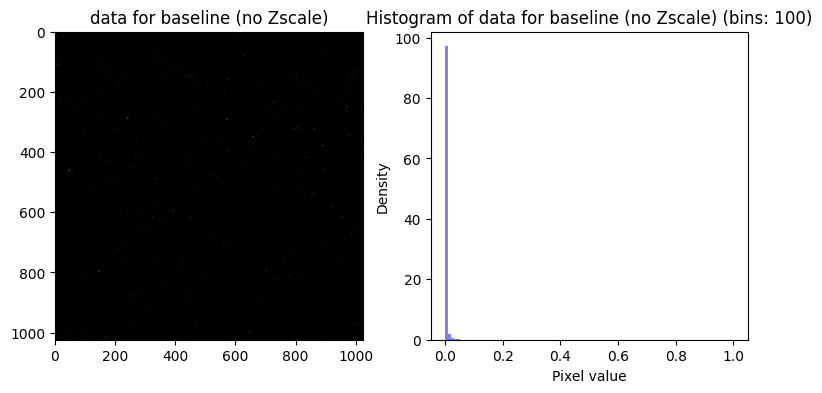

In [237]:
# plot density histogram of sample_npy
sample_npy_baseline_noZ = deepcopy(sample_npy)
sample_npy_baseline_noZ = preprocess_baseline(sample_npy_baseline_noZ)

visulize_data(sample_npy_baseline_noZ, 'data for baseline (no Zscale)')

## Multi-filter Image

In [238]:
sample_npy_filters = deepcopy(sample_npy)
sample_npy_filters = preprocess_for_filters(sample_npy_filters)

In [239]:
linear_npy = apply_filter(sample_npy_filters, 'Linear')
log_npy = apply_filter(sample_npy_filters, 'Log')
power_npy = apply_filter(sample_npy_filters, 'Power')
sqrt_npy = apply_filter(sample_npy_filters, 'Sqrt')
squared_npy = apply_filter(sample_npy_filters, 'Squared')
asinh_npy = apply_filter(sample_npy_filters, 'ASINH')
sinh_npy = apply_filter(sample_npy_filters, 'SINH')

Baseline --> Max pixel value:  1.0 | Min pixel value:  0.0 | Std:  0.0072484728169223385 | Mean:  0.003966708768926205
Linear No Zscale --> Max pixel value:  1.0 | Min pixel value:  0.0 | Std:  0.0072484728169223385 | Mean:  0.003966708768926205


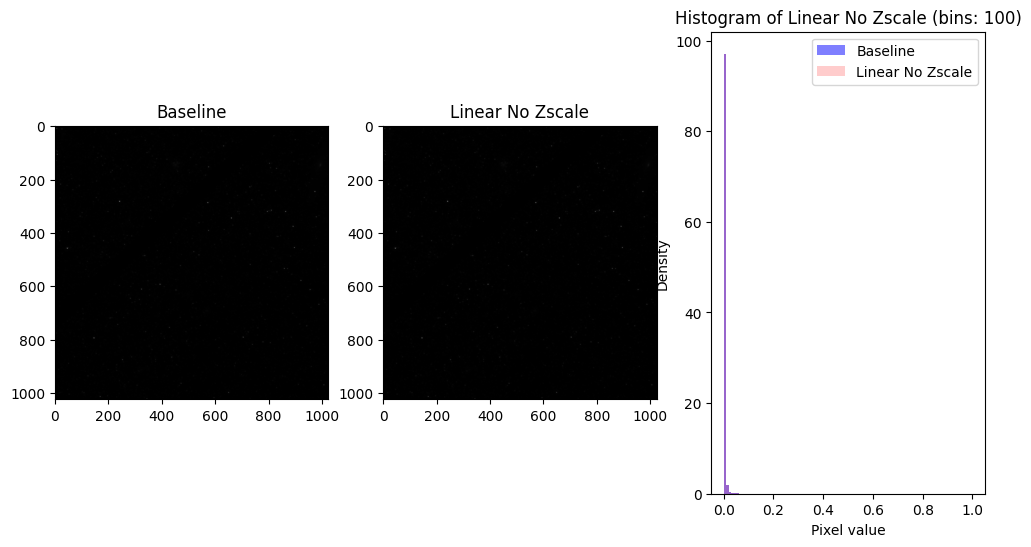

Baseline --> Max pixel value:  1.0 | Min pixel value:  0.0 | Std:  0.0072484728169223385 | Mean:  0.003966708768926205
Log No Zscale --> Max pixel value:  1.0 | Min pixel value:  0.0 | Std:  0.0382053835785462 | Mean:  0.03745151767013851


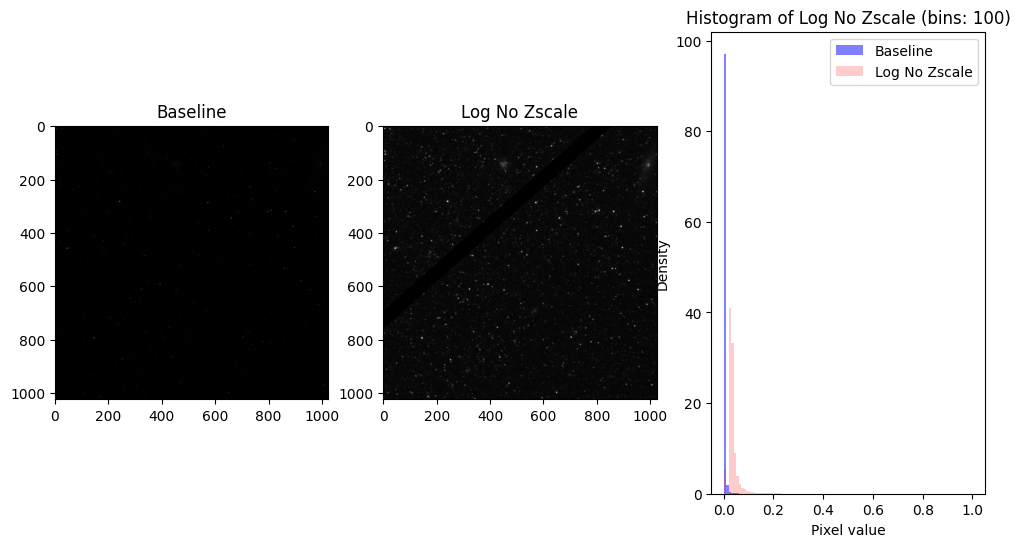

Baseline --> Max pixel value:  1.0 | Min pixel value:  0.0 | Std:  0.0072484728169223385 | Mean:  0.003966708768926205
Power No Zscale --> Max pixel value:  1.0 | Min pixel value:  0.0 | Std:  0.001340632259005854 | Mean:  3.3666964920590186e-05


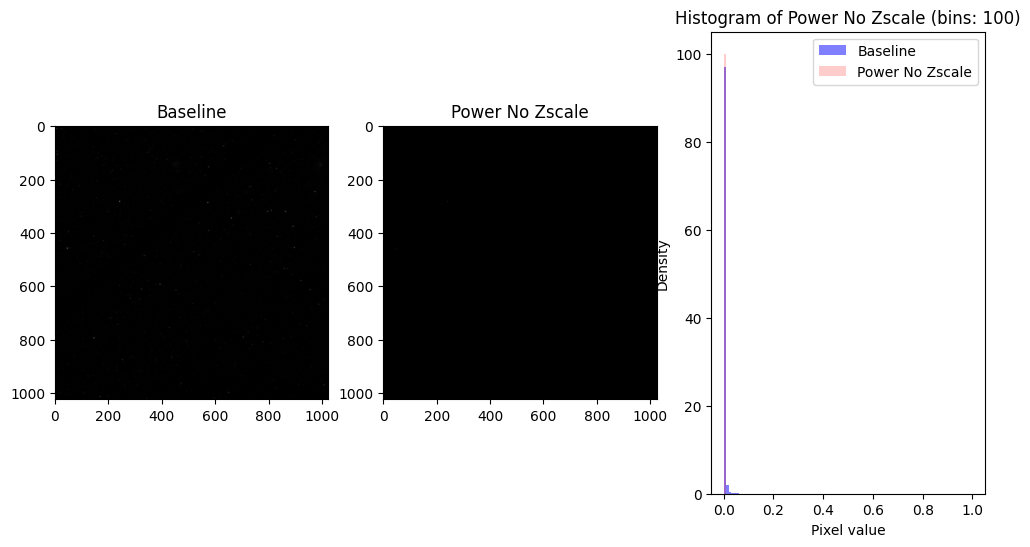

Baseline --> Max pixel value:  1.0 | Min pixel value:  0.0 | Std:  0.0072484728169223385 | Mean:  0.003966708768926205
Sqrt No Zscale --> Max pixel value:  1.0 | Min pixel value:  0.0 | Std:  0.02415146913857317 | Mean:  0.05816713253526213


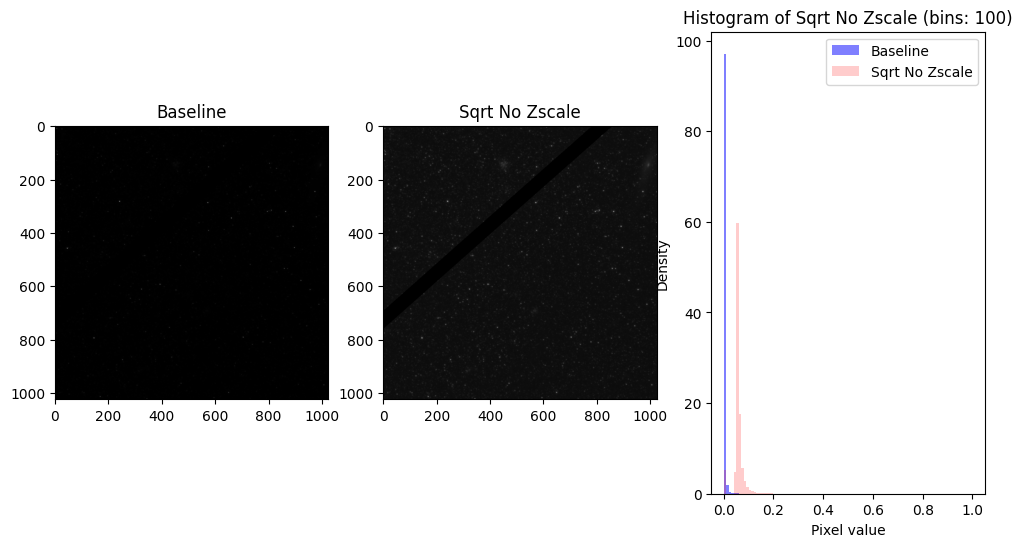

Baseline --> Max pixel value:  1.0 | Min pixel value:  0.0 | Std:  0.0072484728169223385 | Mean:  0.003966708768926205
Squared No Zscale --> Max pixel value:  1.0 | Min pixel value:  0.0 | Std:  0.0029342748935085317 | Mean:  6.82751366351381e-05


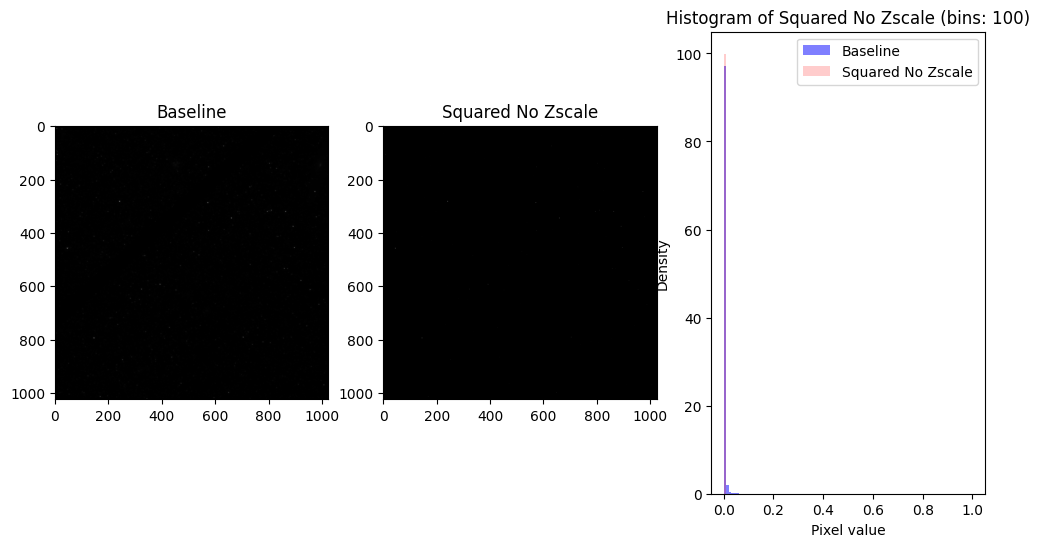

Baseline --> Max pixel value:  1.0 | Min pixel value:  0.0 | Std:  0.0072484728169223385 | Mean:  0.003966708768926205
ASINH No Zscale --> Max pixel value:  1.0 | Min pixel value:  0.0 | Std:  0.01754371388024014 | Mean:  0.013041656183725709


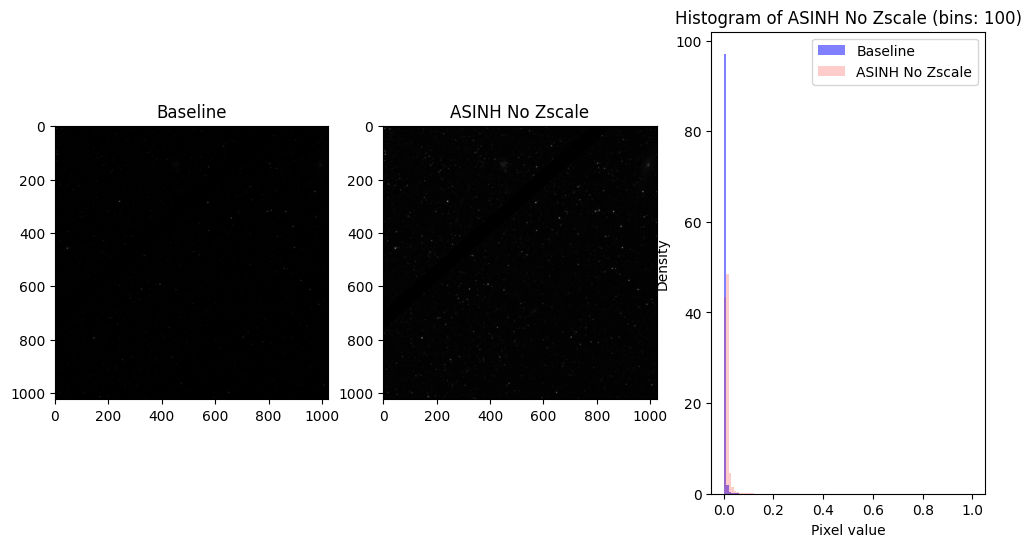

Baseline --> Max pixel value:  1.0 | Min pixel value:  0.0 | Std:  0.0072484728169223385 | Mean:  0.003966708768926205
SINH No Zscale --> Max pixel value:  1.0 | Min pixel value:  0.0 | Std:  0.003043940303744706 | Mean:  0.001196509339112144


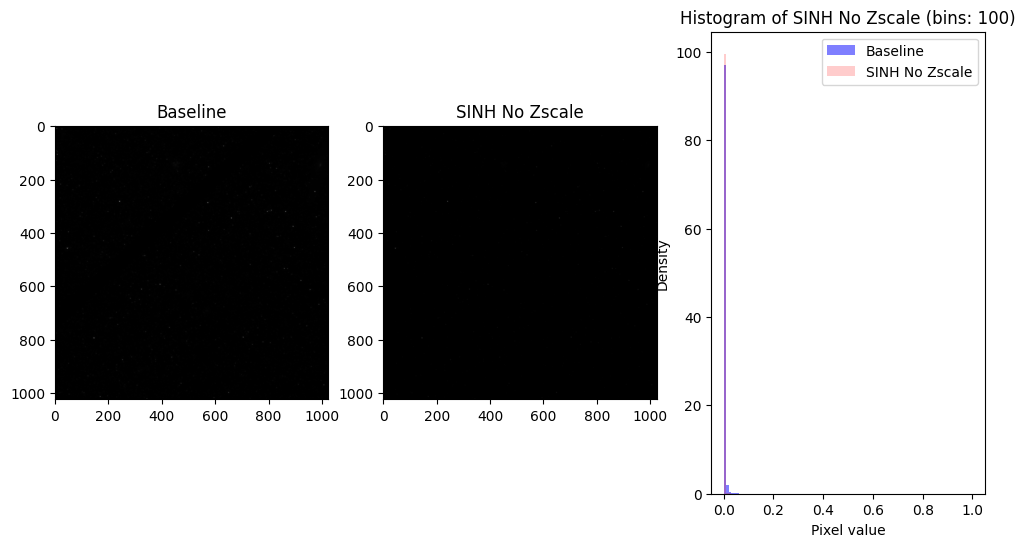

In [240]:
comparison_plot(sample_npy_baseline_noZ, linear_npy, 'Linear No Zscale')
comparison_plot(sample_npy_baseline_noZ, log_npy, 'Log No Zscale')
comparison_plot(sample_npy_baseline_noZ, power_npy, 'Power No Zscale')
comparison_plot(sample_npy_baseline_noZ, sqrt_npy, 'Sqrt No Zscale')
comparison_plot(sample_npy_baseline_noZ, squared_npy, 'Squared No Zscale')
comparison_plot(sample_npy_baseline_noZ, asinh_npy, 'ASINH No Zscale')
comparison_plot(sample_npy_baseline_noZ, sinh_npy, 'SINH No Zscale')

# YoDa visualization

The comparison between the baseline image and the YoDa images, which are feature extracted by YoDa network.

In [7]:
path_original_npy = '../../../export_npy/input_npy/'
path_YoDa = '../../../export_npy/YoDa/'
original_npy_list = glob.glob(path_original_npy + '*.npy')
YoDa_list = glob.glob(path_YoDa + '*.npy')
YoDa_list.sort()
original_npy_list.sort()

In [8]:
print(len(original_npy_list), len(YoDa_list))

131 110


In [14]:
def npy_preprocessing(npy_img):
    npy_img = z(npy_img) # -> return values between 0 and 1
    return npy_img

def YoDa_preprocessing(YoDa_img):
    # YoDa_img[YoDa_img < 0] = 0.0
    # change_nan = 0.0
    # YoDa_img = np.nan_to_num(YoDa_img, nan=change_nan, posinf=change_nan, neginf=change_nan)
    return YoDa_img

In [17]:
npy_img = npy_preprocessing(np.load(original_npy_list[0]))
YoDa_img = YoDa_preprocessing(np.load(YoDa_list[0]))
npy_img.shape, YoDa_img.shape

((1024, 1024, 1), (1024, 1024, 1))

Baseline --> Max pixel value:  1.0 | Min pixel value:  0.0 | Std:  0.2272758878809588 | Mean:  0.248491207893937
YoDa --> Max pixel value:  0.48454314 | Min pixel value:  -0.27846453 | Std:  0.14573863 | Mean:  0.42525253


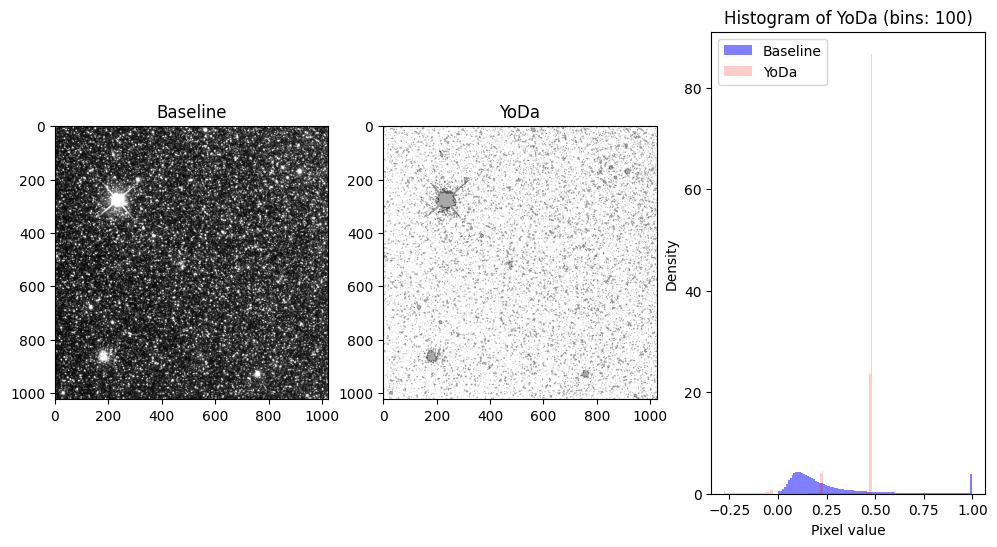

Baseline --> Max pixel value:  1.0 | Min pixel value:  0.0 | Std:  0.19322181103065275 | Mean:  0.3911209337637326
YoDa --> Max pixel value:  0.47993842 | Min pixel value:  -0.27846453 | Std:  0.14187531 | Mean:  0.42390776


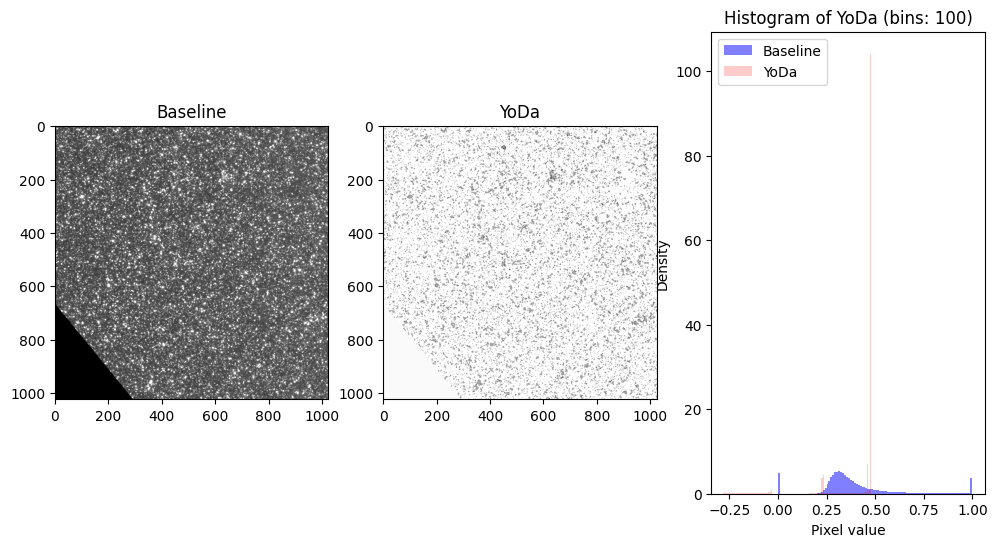

Baseline --> Max pixel value:  1.0 | Min pixel value:  0.0 | Std:  0.1691929509863111 | Mean:  0.2578537113146367
YoDa --> Max pixel value:  0.47982937 | Min pixel value:  -0.27846456 | Std:  0.14413759 | Mean:  0.42608714


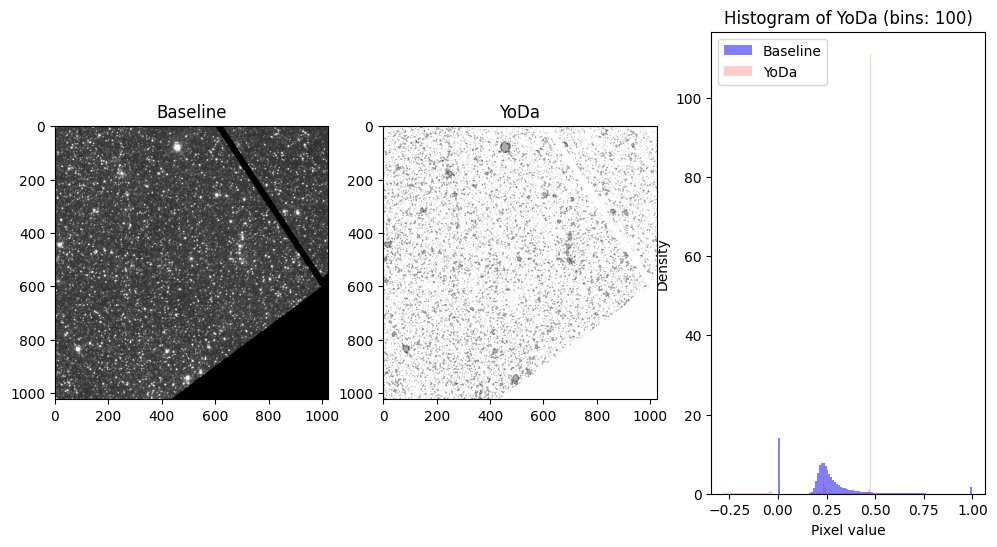

Baseline --> Max pixel value:  1.0 | Min pixel value:  0.0 | Std:  0.19449151551618035 | Mean:  0.35293005580279535
YoDa --> Max pixel value:  0.4846998 | Min pixel value:  -0.27846456 | Std:  0.14527893 | Mean:  0.4251253


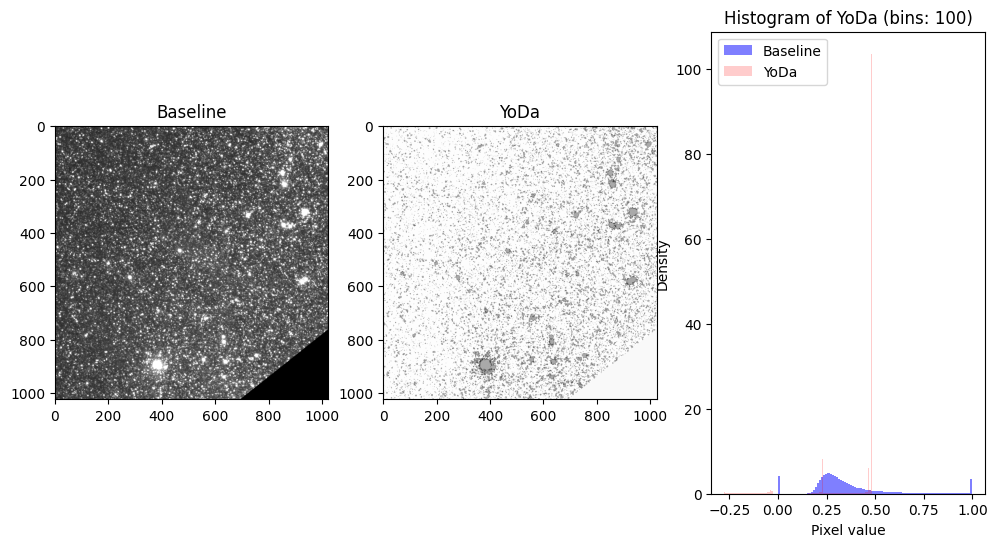

Baseline --> Max pixel value:  1.0 | Min pixel value:  0.0 | Std:  0.16933510223347994 | Mean:  0.14037442380930568
YoDa --> Max pixel value:  0.47569457 | Min pixel value:  -0.27846456 | Std:  0.14124118 | Mean:  0.42535797


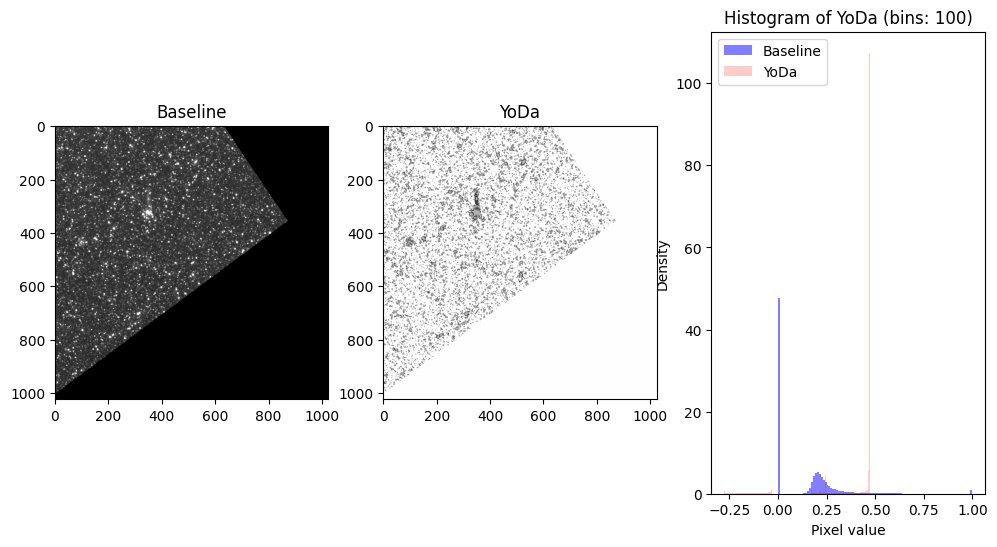

Baseline --> Max pixel value:  1.0 | Min pixel value:  0.0 | Std:  0.19613846159646744 | Mean:  0.16274913493693785
YoDa --> Max pixel value:  0.4857889 | Min pixel value:  -0.27846456 | Std:  0.1496378 | Mean:  0.42808214


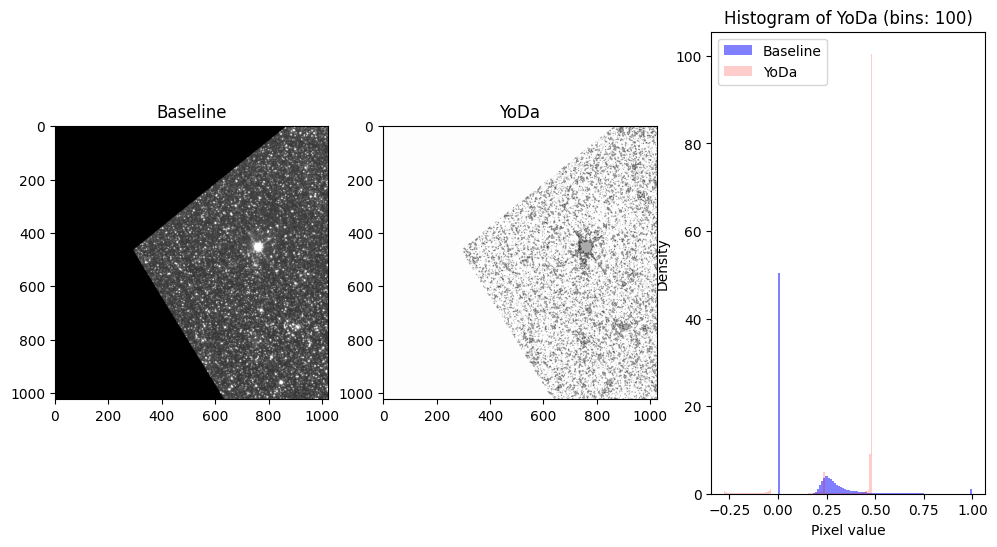

Baseline --> Max pixel value:  1.0 | Min pixel value:  0.0 | Std:  0.18939178762443087 | Mean:  0.3810550903645271
YoDa --> Max pixel value:  0.47895187 | Min pixel value:  -0.27846456 | Std:  0.14038898 | Mean:  0.42325705


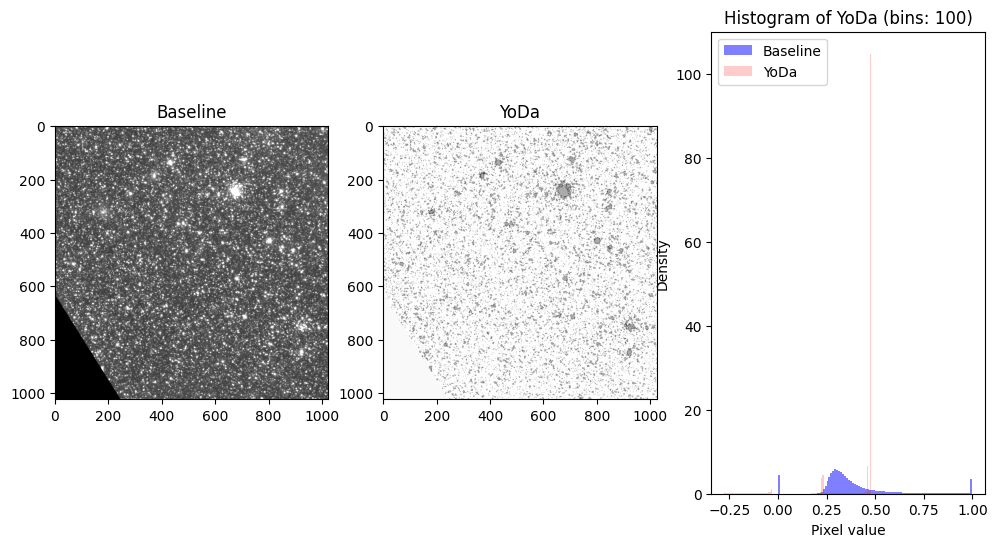

Baseline --> Max pixel value:  1.0 | Min pixel value:  0.0 | Std:  0.21941712414065223 | Mean:  0.2668681477391589
YoDa --> Max pixel value:  0.4879111 | Min pixel value:  -0.27846456 | Std:  0.14817469 | Mean:  0.42574242


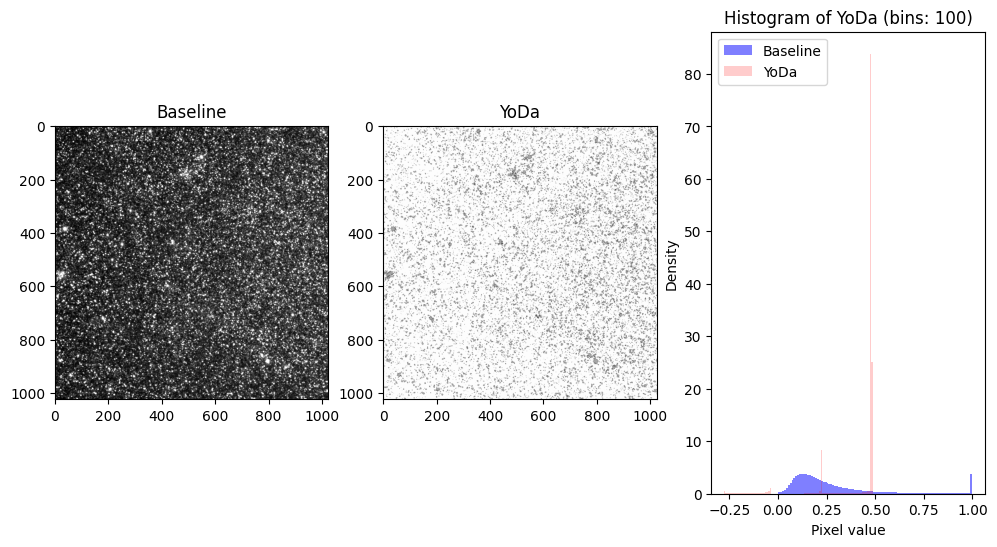

Baseline --> Max pixel value:  1.0 | Min pixel value:  0.0 | Std:  0.1943937747902784 | Mean:  0.4093341904633626
YoDa --> Max pixel value:  0.48003092 | Min pixel value:  -0.27846453 | Std:  0.14073814 | Mean:  0.42243192


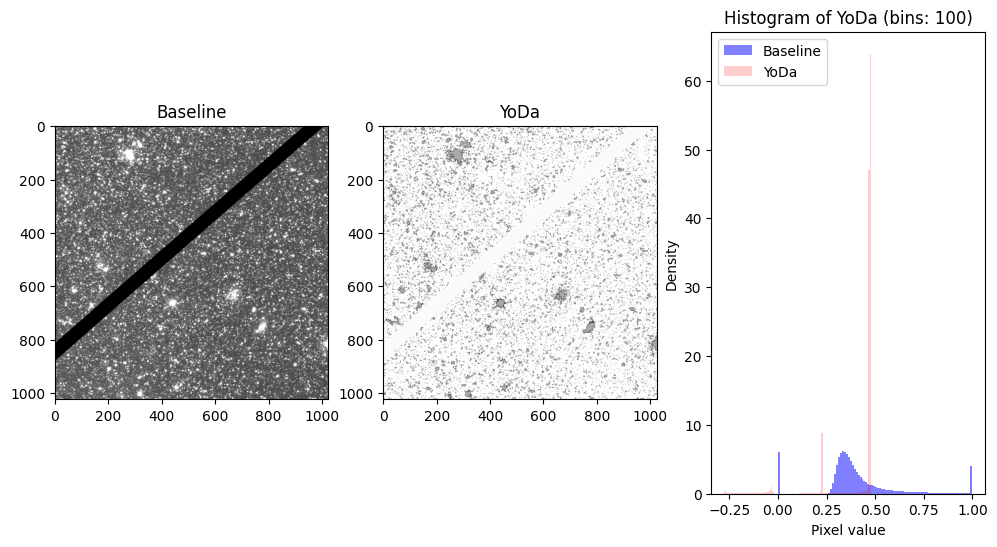

Baseline --> Max pixel value:  1.0 | Min pixel value:  0.0 | Std:  0.18366503536275164 | Mean:  0.38249979921780447
YoDa --> Max pixel value:  0.48395038 | Min pixel value:  -0.27846456 | Std:  0.14590858 | Mean:  0.42650893


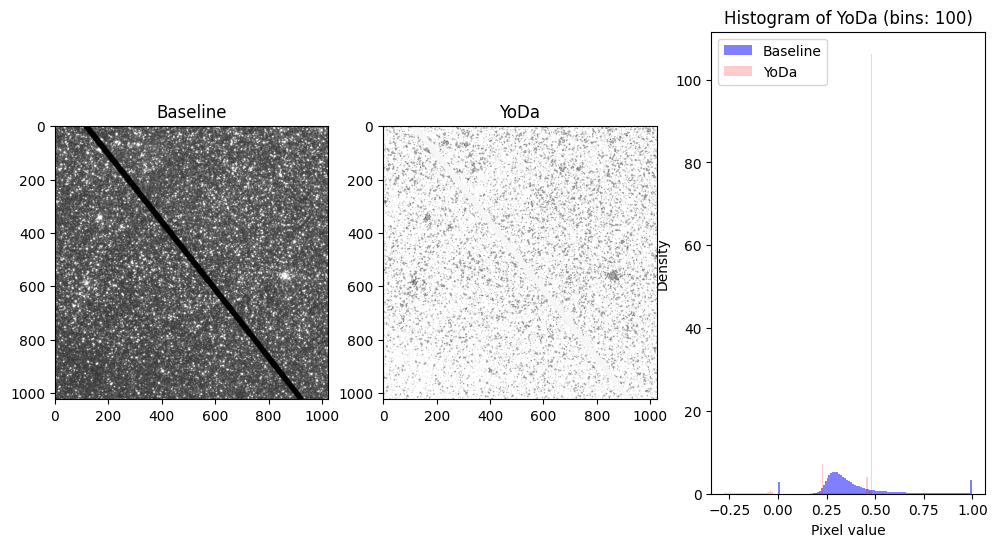

In [20]:
n_plot = 10

for i in range(n_plot):
    i = random.randint(0, len(YoDa_list)-1)
    named_item = YoDa_list[i].split('\\')[-1]
    npy_img = npy_preprocessing(np.load('../../../export_npy/input_npy/' + named_item))
    YoDa_img = YoDa_preprocessing(np.load('../../../export_npy/YoDa/' + named_item))
    comparison_plot(npy_img, YoDa_img, 'YoDa', cmap='gray', bins=100)